# Este es mi cuaderno de Algoritmos 1

## Primera tarea sumativa
Fue realizada utilizando recursividad debido a la simplicidad de hacerlo

In [1]:
#Esta es la primera tarea sumativa de algoritmos 1
#A es una matriz dada en forma de una linea de numeros separadas por espacios y enters

with open('ImagenIslas1.txt', 'r') as f:
    A = [ [int(i) for i in linea.split(' ')] for linea in f]
with open('ImagenIslas2.txt', 'r') as f:
    B = [ [int(i) for i in linea.split(' ')] for linea in f]
with open('ImagenIslas3.txt', 'r') as f:
    C = [ [int(i) for i in linea.split(' ')] for linea in f]


In [5]:
#esta es una pequeña funcion recursiva que chequea las islas cuando se encuentra una
def check_lados(M,coord, extension,f,c,m,n):
    '''
    esta función nos chequea los vecinos de un cuadro y nos avisa si
    esos costados son parte de la isla. 
    M es la matriz de la imagen con las coordenadas y demas,
    coord es una lista de coordenadas que forman parte de la isla,
    extension es la cantidad de tierra que ya posee nuestra isla.

    Si bien no cambié prácticamente nada de lo que era el algoritmo de mi tarea, creo que el mismo ya utilizaba
    el concepto fundamental que se usa en un bfs, así que no sentí que hubiera valido la pena tratar de complicar
    más el algoritmo intentando agregando objetos y otras estructuras auxiliares, espero esto no sea un problema.
    '''
    coord.append([f,c])
    extension= extension +1
    
    if(f-1>-1):
        if(M[f-1][c]==1 and not([f-1,c] in coord)):
            coord,extension = check_lados(M,coord,extension,f-1,c,m,n)
    if(f+1<m):
        if(M[f+1][c]==1 and not([f+1,c] in coord)):
            coord,extension = check_lados(M,coord,extension,f+1,c,m,n)
    if(c-1>-1):
        if(M[f][c-1]==1 and not([f,c-1] in coord)):
            coord,extension = check_lados(M,coord,extension,f,c-1,m,n)
    if(c+1<n):
        if(M[f][c+1]==1 and not([f,c+1] in coord)):
            coord,extension = check_lados(M,coord,extension,f,c+1,m,n)
    
    return coord, extension
    

In [6]:
def constr_dic(M):
    '''
    Esta funcion construye un diccionario en el que va cargando islas, junto
    con sus extensiones y coordenadas que forman parte de las mismas    
    '''
    #como M es una matriz, todas sus filas tienen igual cantidad de componentes
    m = len(M)    #cantidad de filas
    n = len(M[0]) #cantidad de columnas
    
    '''
    Ejemplo de como queremos que se vea la estructura de una isla
    dic_islas = {"Isla1":[ ["Extension",4,"hectómetros"], ["Coordenadas",[ [1,1], [1,2], ... ] ] ] }
    '''
    cant_islas = 0 #nos ayuda a nombrar las islas que van apareciendo
    dic_islas = {} #aca guardamos las islas con sus extensiones y coordenadas
    flag = 0 #nos indica cuando se encontro una isla
    
    for i in range(0,m):
        for j in range(0,n):
            if( M[i][j]==1):
                flag = 1 #se encontro una potencial isla o parte de una isla anterior
                
                for x in dic_islas: 
                    if([i,j] in dic_islas[x][1][1][:]): #chequea si la coordenada ya esta en alguna de las islas anteriores
                        flag = 0                        #si el pedazo ya estaba en otra isla, es una falsa alarma

                #si la bandera sigue arriba, es porque se encontro una nueva isla
                #si no, es porque la isla ya estaba
                if(flag==1):
                    cant_islas = cant_islas + 1
                    #[coord, extension] = check_lados(M,[[i,j]], 1)
                    coord, extension = check_lados(M,[], 0,i,j,m,n)
                    dic_islas["Isla" + str(cant_islas)] = [["Extension",extension,"hectómetros"],
                                                            ["Coordenadas",coord]];
                    flag = 0
 
    
    #para visualizar nuestras islas y sus extensiones, no vemos las coordenadas pq estorban
    for x in dic_islas:
        print(x,": "+ dic_islas[x][0][0] +", "+ str(dic_islas[x][0][1]) +" "+ dic_islas[x][0][2])

In [7]:
constr_dic(A)
print("\n")
constr_dic(B)
print("\n")
constr_dic(C)

Isla1 : Extension, 8 hectómetros
Isla2 : Extension, 6 hectómetros
Isla3 : Extension, 7 hectómetros


Isla1 : Extension, 10 hectómetros
Isla2 : Extension, 6 hectómetros
Isla3 : Extension, 9 hectómetros


Isla1 : Extension, 28 hectómetros


In [4]:
#NO CORRER

constr_dic(A)
print("\n")
constr_dic(B)
print("\n")
constr_dic(C)

Isla1 : Extension, 8 hectómetros
Isla2 : Extension, 6 hectómetros
Isla3 : Extension, 7 hectómetros


Isla1 : Extension, 10 hectómetros
Isla2 : Extension, 6 hectómetros
Isla3 : Extension, 9 hectómetros


Isla1 : Extension, 28 hectómetros


# Segunda tarea sumativa
En esta tarea usamos la estructura de pila, por lo cual importamos el documento en el que creamos este objeto

In [5]:
from Pila_Imp import Pila
#Para probar
cad1 = "+9*26" #debe salir 21
cad2 = "*-567" #debe salir -7
cad3 = "-+8/632" #debe salir 8
cad4 = "12+9*26"

In [6]:
def evaluarExpresionPrefija(cadena):
    cad_inv = [caracter for caracter in cadena]
    cad_inv.reverse() #cargamos la cadena invertida en una lista  
    numeros = Pila() #esto nos sirve para cargar los numeros en una lista separada
    
    for x in cad_inv:
        if(x=='+'):
            b = numeros.quitar()
            a = numeros.quitar()
            numeros.insertar(b+a)
        elif(x=='-'):
            b = numeros.quitar()
            a = numeros.quitar()
            numeros.insertar(b-a)
        elif(x=='*'):
            b = numeros.quitar()
            a = numeros.quitar()
            numeros.insertar(b*a)
        elif(x=='/'):
            b = numeros.quitar()
            a = numeros.quitar()
            numeros.insertar(b/a)
        else:
            numeros.insertar(int(x))
    
    if (numeros.tamanho()==1):
        return numeros.quitar()
    else:
        print("Ocurrio un error!") #no me paso pero por si llega a pasar que alguien mete algo raro

In [7]:
print(evaluarExpresionPrefija(cad1))
print(evaluarExpresionPrefija(cad2))
print(evaluarExpresionPrefija(cad3))
print(evaluarExpresionPrefija(cad4))

21
-7
8.0
Ocurrio un error!
None


# Tercera tarea sumativa
En esta tarea se nos da un monto de dinero junto con un conjunto de tipos de monedas disponibles. Nuestra tarea es devolver el monto utilizando la minima cantidad de monedas posible, y luego devolver una lista con la cantidad de monedas de cada tipo utilizadas.

In [8]:
#Esta es la tercera tarea sumativa de Algo1
#Para probar
M1 = 60000; #debe salir 3 de 20k
M2 = 80000; #debe salir 4 de 20k
M3 = 65000; #debe salir 3 de 20k y 5 de 1k
d1  = [1000,20000,50000];
#se asume que siempre se podra tener un monto 
#exactamente dividido por las denominaciones

In [9]:
def menos_monedas(M,denominaciones,len_inicial):
    #M es el monto que queremos conseguir en monedas
    #denominaciones son las denominaciones de las monedas 
    #i son la candidad de elementos de cada denominacion
    monto = M;
    den = denominaciones.copy();
    den_inv = denominaciones.copy(); den_inv.reverse();
    i_inv = [];
    
    #Creacion de la lista i correspondiente a esta iteracion
    for d in den_inv:
        i_inv.append(monto//d);
        monto = monto % d;
    i = i_inv; i.reverse();
    i = i + [0]*(len_inicial-len(i_inv))
    
    #Condicion de parada en la recursion
    if(len(den)>1):
        den.pop()
    else:
        return i
    
    #Recursion
    if( sum(i) < sum(menos_monedas(M,den,len_inicial)) ):
        return i
    else:
        return menos_monedas(M,den,len_inicial)


In [10]:
print(menos_monedas(M1,d1,len(d1)))
print(menos_monedas(M2,d1,len(d1)))
print(menos_monedas(M3,d1,len(d1)))

[0, 3, 0]
[0, 4, 0]
[5, 3, 0]


# Quinta tarea sumativa 
En esta tarea usamos la estructura de arboles binarios y de nodos. Luego vemos si un arbol esta balanceado o no.

In [11]:
#Esta es la quinta tarea sumativa de de algoritmos 1
from nodos_y_arboles import *
#Casos de prueba
# Árbol 1 para la prueba (No es balanceado)
arbol1 = ArbolBin(); 
nodo1 = Nodo(2); arbol1.raiz = nodo1
nodo2 = Nodo(5); nodo2.padre = nodo1; nodo1.hijo_izq = nodo2
nodo3 = Nodo(1); nodo3.padre = nodo1; nodo1.hijo_der = nodo3
nodo4 = Nodo(6); nodo4.padre = nodo2; nodo2.hijo_izq = nodo4
nodo5 = Nodo(3); nodo5.padre = nodo2; nodo2.hijo_der = nodo5
nodo6 = Nodo(6); nodo6.padre = nodo3; nodo3.hijo_der = nodo6
nodo7 = Nodo(7); nodo7.padre = nodo5; nodo5.hijo_izq = nodo7
nodo8 = Nodo(9); nodo8.padre = nodo6; nodo6.hijo_izq = nodo8
nodo9 = Nodo(3); nodo9.padre = nodo6; nodo6.hijo_der = nodo9
nodo10 = Nodo(0); nodo10.padre = nodo8; nodo8.hijo_izq = nodo10
arbol1.mostrarArbolBin()
# Árbol 2 para la prueba (Es balanceado)
arbol2 = ArbolBin(); 
nodo1 = Nodo(2); arbol2.raiz = nodo1
nodo2 = Nodo(5); nodo2.padre = nodo1; nodo1.hijo_izq = nodo2
nodo3 = Nodo(1); nodo3.padre = nodo1; nodo1.hijo_der = nodo3
nodo4 = Nodo(6); nodo4.padre = nodo2; nodo2.hijo_izq = nodo4
nodo5 = Nodo(3); nodo5.padre = nodo2; nodo2.hijo_der = nodo5
nodo6 = Nodo(6); nodo6.padre = nodo3; nodo3.hijo_der = nodo6
nodo7 = Nodo(7); nodo7.padre = nodo5; nodo5.hijo_izq = nodo7
nodo8 = Nodo(9); nodo8.padre = nodo6; nodo6.hijo_izq = nodo8
nodo9 = Nodo(3); nodo9.padre = nodo6; nodo6.hijo_der = nodo9
nodo10 = Nodo(0); nodo10.padre = nodo3; nodo3.hijo_izq = nodo10
arbol2.mostrarArbolBin()

El arbol es:
2
├────5
│    ├────6
│    └────3
│         └────7
└────1
     └────6
          ├────9
          │    └────0
          └────3
El arbol es:
2
├────5
│    ├────6
│    └────3
│         └────7
└────1
     ├────0
     └────6
          ├────9
          └────3


In [12]:
#Funcion solicitada
def esBalanceado(arbol):
    '''
    Función que retorna True si el árbol es balanceado, y False en caso contrario
    '''
    if arbol.raiz==None:
        return True
    else:
        arbolAux1 = ArbolBin(); arbolAux2 = ArbolBin();
        arbolAux1.raiz = arbol.raiz.hijo_izq
        arbolAux2.raiz = arbol.raiz.hijo_der
        if( abs(arbolAux1.altura()-arbolAux2.altura())>1 ):
            return False
        else:
            return (esBalanceado(arbolAux1) and esBalanceado(arbolAux2))
    del arbolAux1
    del arbolAux2

In [13]:
#Test de la función
print(esBalanceado(arbol1))
print(esBalanceado(arbol2))

False
True


In [14]:
print(arbol1.altura())
print(arbol2.altura())
print(nodo4.nivel())
print(nodo8.nivel())

4
3
2
3


# Sexta Tarea Sumativa
En esta tarea monitoreamos sondas colocadas en el amazonas y vemos si es que la sonda master puede comunicarse con todas las otras o no teniendo en cuenta el criterio de conexión-comunicación.
## A continuación vemos algunos pasos preliminares

In [12]:
def leerArchivo(nombreArchivo):
    lineas = []
    with open(nombreArchivo, 'r') as f:
        for linea in f:
            lineas.append(linea.rstrip())
    return lineas

lineasEntrada = leerArchivo("entrada.txt")
for linea in lineasEntrada:
    print(linea)

4
1 0 0 1 -1 0 0 -1
8
1 0 1 1 0 1 -1 1 -1 0 -1 -1 0 -1 1 -1
6
0 3 0 4 1 3 -1 3 -1 -4 -2 -5
0


x: 0	y: 3
x: 0	y: 4
x: 1	y: 3
x: -1	y: 3
x: -1	y: -4
x: -2	y: -5


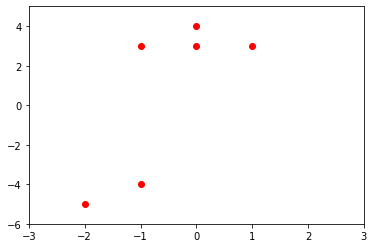

In [13]:
import math

#Definimos a un punto en el espacio bidimensional
class Punto:
    def __init__(self,x_ent,y_ent):
        self.x=x_ent
        self.y=y_ent
    
    def __str__(self):
        return "x: "+str(self.x)+"\ty: "+str(self.y)

#Definimos la distancia usual
def distancia(p1,p2):
    return math.sqrt((p1.x-p2.x)**2 + (p1.y-p2.y)**2)

#Función que obtiene las coordenadas de todos los n puntos en una línea (con el formato de entrada)
def obtenerPuntos(n_cad,linea_val):
    puntos = []
    n = int(n_cad)
    valores_cad = linea_val.split()
    for i in range(n):
        puntos.append( Punto( int(valores_cad[i*2]),int(valores_cad[i*2+1]) ) )
    return puntos

#Esto es solamente para visualizar la ubicación de los puntos para un caso de entrada dado (en el ejemplo dado, sería el caso 3)
import matplotlib.pyplot as plt
puntos= obtenerPuntos(lineasEntrada[4],lineasEntrada[5])
for p in puntos:
    print(p)
X_puntos = []; Y_puntos = []
for p in puntos:
    X_puntos.append(p.x)
    Y_puntos.append(p.y)

plt.plot(X_puntos, Y_puntos, 'ro')
plt.axis([-3, 3, -6, 5])
plt.show()

In [14]:
import networkx as nx
import matplotlib.pyplot as plt

#Por simplicidad, no se realizan ciertas verificaciones. 
#Por ejemplo: al agregar una arista, no se verifica que ambos vértices estén en el grafo.

#Vertices con los debidos vecinos (lugar a donde dirige)
class Vertice:
    def __init__(self,x):
        self.clave = x
        self.vecinos = []  #lista de adyacencias
        self.color = None
        self.pi = None
        self.d = None

#Grafo no dirigido, sin pesos
class Grafo_ND_SP: 
    def __init__(self):
        self.vertices = []  #lista de vertices
        
    def agregarVertice(self,n):
        self.vertices.append(n)
    
    def agregarArista(self,a,b): 
        a.vecinos.append(b)
        b.vecinos.append(a)
    
    def mostrarVecinos(self):
        print("Datos del grafo:")
        for u in self.vertices:
            print("Vertice",u.clave,": ",end="")
            for v in u.vecinos:
                print(v.clave," ",end="")
            print("")
        
    def mostrarGrafo(self):
        G = nx.Graph()
        for u in self.vertices:
            for v in u.vecinos:
                G.add_edge(u.clave,v.clave)
        nx.draw_circular(G,with_labels=True)
        plt.show()
        
#Grafo dirigido, sin pesos
class Grafo_D_SP: 
    def __init__(self):
        self.vertices = []  #lista de vertices
        
    def agregarVertice(self,n):
        self.vertices.append(n)
    
    #agrega una arista de A a B
    def agregarArista(self,a,b): 
        a.vecinos.append(b)
    
    def mostrarVecinos(self):
        print("Datos del grafo:")
        for u in self.vertices:
            print("Vertice",u.clave,": ",end="")
            for v in u.vecinos:
                print(v.clave," ",end="")
            print("")
        
    def mostrarGrafo(self):
        G = nx.DiGraph()
        for u in self.vertices:
            for v in u.vecinos:
                G.add_edge(u.clave,v.clave)
        nx.draw_circular(G,with_labels=True)
        plt.show()    
        
    def BFS(self,s):
        n = len(self.vertices)+1
        for u in self.vertices:
            u.color = "BLANCO"
            u.d = n #distancia al vertice original
            u.pi = None
        s.color = "GRIS"
        s.d = 0
        s.pi = None
        fila = Fila()
        fila.insertar(s)
        while not fila.esta_Vacia():
            u = fila.quitar()
            for v in u.vecinos:
                if v.color == "BLANCO":
                    v.color = "GRIS"
                    v.d = u.d+1
                    v.pi = u
                    fila.insertar(v)
            u.color = "NEGRO"

## Resolución del ejercicio

In [15]:
import Fila_Imp

def armarGrafo(lineas):
    Grafos= []
    m= len(lineas)-1
    i=0
    inf= math.inf
    while (i!=m):
        grafo= Grafo_D_SP()
        if(lineas[i]!=0):
            puntos= obtenerPuntos(lineas[i],lineas[i+1])
            n=len(puntos)
            #Aca agregue una modificacion que me recomendo el profe Colbes
            listaVertices = []
            for j in range(n):
                listaVertices.append(Vertice(j+1))
            
            for j in range(n):
                p_actual= puntos[j]
                vecino1= Punto(inf,inf); vecino2= Punto(inf,inf);
                #########################################
                for k in range(n):
                    p_comp= puntos[k]
                    if(p_comp!=p_actual):
                        #variables de comparacion, nos ayudan a entender lo que pasa
                        d1= distancia(p_comp,p_actual)
                        d2= distancia(vecino1,p_actual)            
                        cond1= d1<d2
                        cond2= (d1==d2)and(p_comp.x<vecino1.x)
                        cond3= (d1==d2)and(p_comp.x==vecino1.x)and(p_comp.y<vecino1.y)
                        cond=  cond1 or cond2 or cond3
                        if(cond):
                            vecino1= p_comp
                            #mod
                            vert1= listaVertices[k] #No creamos un nuevo objeto, solo accedemos a un elemento de la lista
                ##########################################            
                for k in range(n):
                    p_comp= puntos[k]
                    if(p_comp!=p_actual)and(p_comp!=vecino1):
                        d1= distancia(p_comp,p_actual)
                        d2= distancia(vecino2,p_actual)
                        cond1= d1<d2
                        cond2= (d1==d2)and(p_comp.x<vecino2.x)
                        cond3= (d1==d2)and(p_comp.x==vecino2.x)and(p_comp.y<vecino2.y)
                        cond=  cond1 or cond2 or cond3
                        if(cond):
                            vecino2= p_comp
                            #mod
                            vert2= listaVertices[k] #No creamos un nuevo objeto, solo accedemos a un elemento de la lista
                ##########################################                              
                vert0= listaVertices[j]
                grafo.agregarVertice(vert0)
                grafo.agregarArista(vert0,vert1)
                grafo.agregarArista(vert0,vert2)
            i= i+1
        Grafos.append(grafo)
        i= i+1
    
    return Grafos

In [16]:
def buenaConexion(g):
    s = g.vertices[0] #Suponemos que el grafo tiene al menos un vértice
    g.BFS(s)
    #Verificamos que todos los vértices sean de color negro
    for v in g.vertices:
        if v.color != "NEGRO":
            print(v.clave)
            return False
    return True
    

In [17]:
def resolverProblemas(lineas):
    grafos= armarGrafo(lineas)
    
    for g in grafos: 
        g.mostrarGrafo()
        
        if(buenaConexion(g)):
            print("Todas las estaciones son alcanzables")
        else:
            print("No todas las estaciones son alcanzables")

## Salida

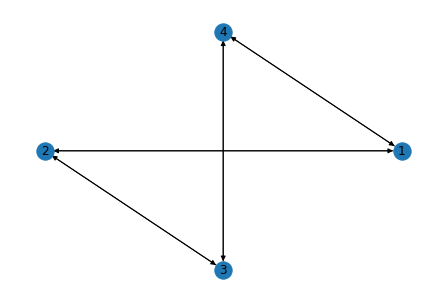

Todas las estaciones son alcanzables


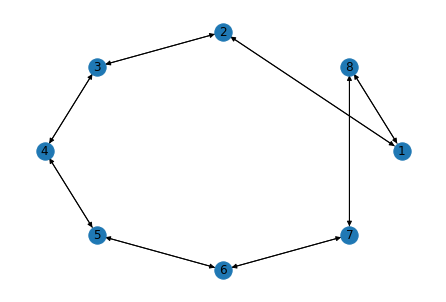

Todas las estaciones son alcanzables


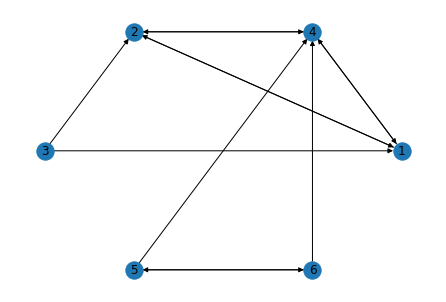

3
No todas las estaciones son alcanzables


In [18]:
lineasEntrada = leerArchivo("entrada.txt")
resolverProblemas(lineasEntrada)

# Septima Tarea Sumativa
En esta tarea guiaremos a un robot a lo largo de un laberinto por el camino más corto posible.
## A continuación vemos algunos pasos preliminares

In [2]:
import numpy as np

def leerArchivo(nombreArchivo):
    lineas = []
    with open(nombreArchivo, 'r') as f:
        for linea in f:
            lineas.append(linea.rstrip())
    return lineas

def obtenerCaso(nombreArchivo):
    lineas = leerArchivo(nombreArchivo)
    matriz_car = []
    valores_cad = lineas[0].split()
    m = int(valores_cad[0])
    n = int(valores_cad[1])
    for j in range(m):
        fila = []
        fila_cad = lineas[j+1]
        for x in fila_cad:
            fila.append(x)
        matriz_car.append(fila)
    return matriz_car

def imprimirMatriz(matriz):
    for fila in matriz:
        for x in fila:
            print(x,end=" ")
        print("")
    print("")

In [3]:
laberinto1= obtenerCaso("Caso1Tarea7.txt")
imprimirMatriz(laberinto1)

0 0 1 0 0 0 0 0 1 1 1 0 1 1 1 1 1 0 
0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 1 0 
0 0 1 0 0 0 1 0 0 1 0 1 1 1 1 1 1 0 
0 0 1 1 1 0 1 0 0 1 1 1 0 0 0 0 0 0 
0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 
0 i 0 0 1 0 1 0 0 1 0 1 1 1 1 1 1 1 
0 0 0 0 1 0 1 0 0 1 0 0 0 0 0 0 0 0 
0 0 1 0 1 0 1 0 0 1 0 0 0 0 0 0 0 f 
0 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 



In [15]:
def coordValida(f,c,m,n,mat,val):
    if (f<0 or c<0 or f>=m or c>=n):
        return False
    elif (mat[f][c]==m*n or mat[f][c]<=val):
        return False
    else:
        return True
    
def coordValida2(f,c,m,n,mat,val):
    if (f<0 or c<0 or f>=m or c>=n):
        return False
    elif (mat[f][c]>=val):
        return False
    else:
        return True

def matDistancia(laberinto):
    m= len(laberinto)
    n= len(laberinto[0])
    matDist= (m*n-1)*np.ones((m,n),dtype=int)
    for f in range(m):
        for c in range(n):
            if (laberinto[f][c]=='i'):
                f_inicio= f; c_inicio= c;
                matDist[f][c]= 0
            elif(laberinto[f][c]=='f'):
                f_fin= f; c_fin= c;
            elif(laberinto[f][c]=='1'):
                matDist[f][c]= m*n
    def dist_rec(af,ac,am,an,amat,aval):    
        vecinos= [(1,0),(-1,0),(0,1),(0,-1)];
        for v in vecinos:
            p=af+v[0]; q= ac+v[1];
            if(coordValida(p,q,am,an,amat,aval+1)):
                amat[p][q]=aval+1
                dist_rec(p,q,am,an,amat,aval+1)
    dist_rec(f_inicio,c_inicio,m,n,matDist,0)
    #print(matDist)
    return [matDist,f_fin,c_fin]

def obtenerCamino(mat,f,c):
    m= len(mat); n= len(mat[0])
    camino=[(f,c)]
    def camino_rec(amat,af,ac,acam,am,an):
        vecinos= [(1,0),(-1,0),(0,1),(0,-1)];
        for v in vecinos:
            p= af+v[0]; q= ac+v[1];
            if(coordValida2(p,q,am,an,amat,amat[af][ac])):
                acam.append((p,q))
                camino_rec(amat,p,q,acam,am,an)
                break    
    camino_rec(mat,f,c,camino,m,n)
    camino.reverse()
    return camino

def responderPreguntas(laberinto):
    [matDist,f_fin,c_fin]= matDistancia(laberinto)
    resp1= (matDist[f_fin][c_fin]!=len(laberinto)*len(laberinto[0])-1)
    if(resp1):
        resp2= matDist[f_fin][c_fin]
        resp3= obtenerCamino(matDist,f_fin,c_fin)
    else:
        resp2= None
        resp3= None
    return [resp1,resp2,resp3]   

In [5]:
[resp1,resp2,resp3]= responderPreguntas(laberinto1)

#Pregunta 1: ¿Se puede alcanzar la posición final desde la inicial?
print("¿Es posible llegar al final desde el inicio?",resp1)

#Pregunta 2: ¿Cuál es la distancia mínima entre el inicio y el final?
if resp1:
    print("La distancia es:",resp2)
    
if resp1:
    print("La trayectoria del inicio a fin es:","\n\n",resp3)
    #imprimirCaminoMasCorto(camino1)

¿Es posible llegar al final desde el inicio? True
La distancia es: 36
La trayectoria del inicio a fin es: 

 [(5, 1), (5, 2), (5, 3), (6, 3), (7, 3), (8, 3), (8, 4), (8, 5), (7, 5), (6, 5), (5, 5), (4, 5), (3, 5), (2, 5), (2, 4), (1, 4), (0, 4), (0, 5), (0, 6), (0, 7), (1, 7), (1, 8), (2, 8), (3, 8), (4, 8), (4, 9), (4, 10), (5, 10), (6, 10), (6, 11), (6, 12), (6, 13), (6, 14), (6, 15), (6, 16), (6, 17), (7, 17)]


In [6]:
#De aquí en adelante es un "bonus", solo para visualizar mejor la solución#
def generarMatrizCamino(laberinto,camino):
    #Inicializacion
    m = len(laberinto) #cantidad de filas
    n = len(laberinto[0]) #cantidad de columnas
    matrizCamino = []
    for i in range(m):
        fil=[]
        for j in range(n):
            if laberinto[i][j]=="1":
                fil.append(2) #para los obstaculos
            elif laberinto[i][j]=="i" or laberinto[i][j]=="f":
                fil.append(3) #para el inicio y el final
            else:
                fil.append(0)
        matrizCamino.append(fil)
    #Marcamos el camino
    for x,y in camino:
        if matrizCamino[x][y] == 0:
            matrizCamino[x][y] = 1
    return matrizCamino

import matplotlib.pyplot as plt
def mostrarSolucion(matrizCamino):
    fig, ax = plt.subplots()
    ax.matshow(matrizCamino, cmap=plt.cm.Blues)
    plt.axis('off')
    plt.show()

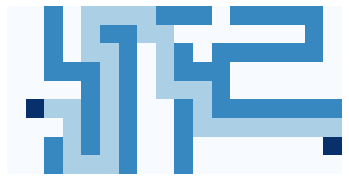

In [7]:
if resp1:
    matrizCamino1 = generarMatrizCamino(laberinto1,resp3)
    mostrarSolucion(matrizCamino1)

In [8]:
laberinto2= obtenerCaso("Caso2Tarea7.txt")
print(responderPreguntas(laberinto2))

[False, None, None]


# Octava Tarea Sumativa
Determinaremos cual de los algoritmos proporcionados nos devuelve un MST y luego lo probaremos.

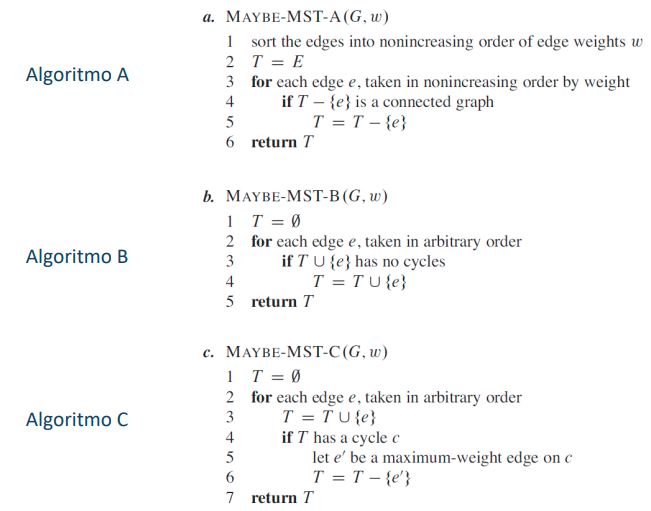

## Análisis
a) El algoritmo A nos devuelve un MST al tomar el grafo inicial con todas sus aristas e ir descartando las que no resultan indispensables para tener un arbol de tendido, en un orden en el cual las de mayor peso son descartadas primero si es que se cumple la condición de que no son insdispensables.

b) El algoritmo B no nos asegura de que T sea un MST puesto que el mismo va agregando aristas cualesquiera y revisando si el grafo tiene o no ciclos, sin embargo al no tener en cuenta el peso, nada dice que las aristas agregadas serán las que resultan en un MST.

c) El algoritmo C nos devuelve un MST, el mismo sigue una estrategia similar a la del algoritmo anterior, pero cuando se encuentra un ciclo, se elimina la arista de mayor peso que pertenece a este cilo. Este algoritmo en mi parecer resulta mucho menos eficiente que lo que se observa en el primer algoritmo, puesto que hay que analizar el subgrafo originado cada vez que se genera un ciclo y esto toma mucho más tiempo que el revisar cada arista una sola vez y ver si puede ser eliminada o no.

## Pasos preliminares

In [16]:
import networkx as nx
import matplotlib.pyplot as plt
import copy
from Fila_Imp import Fila

class Vertice:
    def __init__(self,x):
        self.clave = x
        self.vecinos = []  #lista de adyacencias y pesos (como tuplas)
        self.grupo = -1 #identificador de los grupos que van formándose
        self.color = None
        self.pi = None
        self.d = None
###############################################################################        
class Grafo_ND_P: #Grafo no dirigido, con pesos
    def __init__(self):
        self.vertices = [] #lista de vertices
        self.aristas = [] #aristas con pesos (a,b,w)
        
    def agregarVertice(self,a):
        self.vertices.append(a)
        
    def agregarArista(self,a,b,peso):
        a.vecinos.append((b,peso))
        b.vecinos.append((a,peso))
        self.aristas.append((a,b,peso))
    
    def quitarArista(self,a,b,peso):
        a.vecinos.remove((b,peso))
        b.vecinos.remove((a,peso))
        self.aristas.remove((a,b,peso))
       
    def copiar(self):
        return copy.deepcopy(self)
    
    def mostrarGrafo(self,tipo="circular"):
        G = nx.Graph()
        for u in self.vertices:
            G.add_node(u.clave) #para mostrar vértices sin aristas incidentes o de salida
        for u,v,p in self.aristas:
            G.add_edge(u.clave,v.clave,weight=p)
        if tipo=="spectral":
            pos = nx.spectral_layout(G)
        elif tipo=="shell":
            pos = nx.shell_layout(G)
        elif tipo=="random":
            pos = nx.random_layout(G)
        elif tipo=="spring":
            pos = nx.spring_layout(G)
        else:
            pos = nx.circular_layout(G)
        labels = nx.get_edge_attributes(G,'weight')
        nx.draw_networkx(G,pos,node_size=700)
        nx.draw_networkx_edge_labels(G,pos,edge_labels=labels)
        plt.axis('off')
        plt.show()
        
    def BFS(self,s):
        n = len(self.vertices)+1
        for u in self.vertices:
            u.color = "BLANCO"
            u.d = n #distancia al vertice original
            u.pi = None
        s.color = "GRIS"
        s.d = 0
        s.pi = None
        fila = Fila()
        fila.insertar(s)
        while not fila.esta_Vacia():
            u = fila.quitar()
            for v in [ u.vecinos[i][0] for i in range(len(u.vecinos)) ]:
                if v.color == "BLANCO":
                    v.color = "GRIS"
                    v.d = u.d+1
                    v.pi = u
                    fila.insertar(v)
            u.color = "NEGRO"
###############################################################################
def leerArchivo(nombreArchivo):
    lineas = []
    with open(nombreArchivo, 'r') as f:
        for linea in f:
            lineas.append(linea)
    return lineas

def leerGrafoArchivo(nombreArchivo):
    Graf = Grafo_ND_P()
    lineas = leerArchivo(nombreArchivo)
    claves = {}
    vertices = lineas[0].split()
    for clav in vertices:
        v = Vertice(clav)
        Graf.agregarVertice(v)
        claves[clav] = v
    
    for i in range(1,len(lineas)):
        linea = lineas[i]
        x = linea.split()
        v1 = claves[x[0]] 
        v2 = claves[x[1]]
        peso = x[2]
        Graf.agregarArista(v1,v2,int(peso))
    return Graf

def conectado(g):
    s = g.vertices[0] #Suponemos que el grafo tiene al menos un vértice
    g.BFS(s)
    #Verificamos que todos los vértices sean de color negro
    for v in g.vertices:
        if v.color != "NEGRO":
            return False
    return True

def algoritmoA(grafo):
    #Ordenamos las aristas de mayor a menor peso
    grafo.aristas.sort(key=lambda x:x[2] ,reverse=True)
    #Aca empieza lo nuevo
    m= len(grafo.aristas)
    cont= 0
    for i in range(m):
        auxG= grafo.copiar()
        auxG.quitarArista(auxG.aristas[cont][0],auxG.aristas[cont][1],auxG.aristas[cont][2])
        if conectado(auxG):
            grafo.quitarArista(grafo.aristas[cont][0],grafo.aristas[cont][1],grafo.aristas[cont][2])
        else:
            cont= cont+1
        del auxG

Primea prueba:

Grafo original


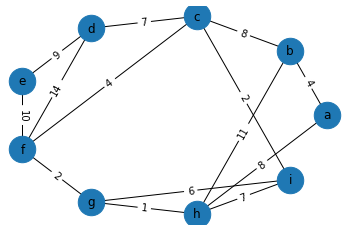



Grafo final


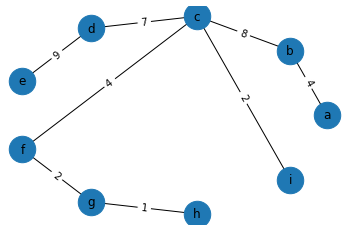

Segunda prueba:

Grafo original


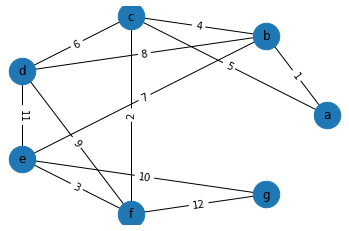



Grafo final


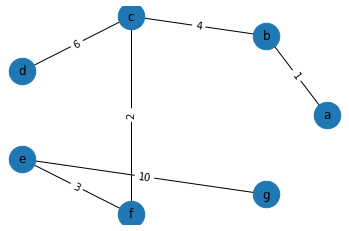

In [17]:
print("Primea prueba:")
grafoTest1 = leerGrafoArchivo("grafo_Kruskal_1.txt")
print("\nGrafo original")
grafoTest1.mostrarGrafo()
print("")
algoritmoA(grafoTest1)
print("\nGrafo final")
grafoTest1.mostrarGrafo()

print("Segunda prueba:")
grafoTest2 = leerGrafoArchivo("grafo_Kruskal_2.txt")
print("\nGrafo original")
grafoTest2.mostrarGrafo()
print("")
algoritmoA(grafoTest2)
print("\nGrafo final")
grafoTest2.mostrarGrafo()

# Novena Tarea Sumativa
Tillería y las ciudades

Jorge Tillería es el presidente de Paraguay, en donde existen n ciudades (enumeradas de 1 a n, siendo 1
la capital). Se cuenta con m caminos que conectan a dichas ciudades. Se puede ir desde la ciudad ui a vi
(y viceversa) empleando el camino i, cuyo tiempo de recorrido es xi. Además, existen k rutas de tren
en el país. Se puede emplear la ruta de tren i para ir desde la capital del país a la ciudad si (y viceversa),
con un tiempo de viaje yi.
Jorge no quiere gastar innecesariamente el dinero del país, por lo que planea cerrar algunas de las rutas
de tren. Tu trabajo consiste en decirle a Jorge la cantidad máxima de rutas de tren que puede cerrar
bajo la siguiente condición: el tiempo del camino más corto desde cada ciudad a la capital no debe
cambiar.

## Pasos preliminares para poder leer los archivos de texto

In [29]:
import networkx as nx
import matplotlib.pyplot as plt
from ColaPrioridad_Imp import Cola_Prioridad

#Por simplicidad, no se realizan ciertas verificaciones. 
#Por ejemplo: al agregar una arista, no se verifica que ambos vértices estén en el grafo.

class Vertice:
    def __init__(self,x):
        self.clave = x
        self.vecinos = []  #lista de adyacencias y pesos (como tuplas)
        self.pi = None
        self.d = None
    
    #Para realizar las comparaciones dentro de la cola de prioridad
    
    def __lt__(self, other):
        return self.d < other.d
    
    def __gt__(self, other):
        return self.d > other.d
    
    #Para poder agregar como clave en un diccionario 
    #(https://stackoverflow.com/questions/10254594/what-makes-a-user-defined-class-unhashable)
    def __hash__(self):
        return id(self)

class Grafo_ND_P: #Grafo dirigido, sin pesos
    def __init__(self):
        self.vertices = []  #aquí usaremos lista en lugar de conjunto
        
    def agregarVertice(self,n):
        self.vertices.append(n)
    
    def agregarArista(self,a,b,peso):
        a.vecinos.append((b,peso))
        b.vecinos.append((a,peso))
        
        
    def mostrarVecinos(self):
        for u in self.vertices:
            print("Vertice",u.clave,": ",end="")
            for v,p in u.vecinos:
                print(v.clave,"(",p,") ",end="",sep='')
            print("")
    
    def buscarNodo(self,clave):
        for u in self.vertices:
            if u.clave == clave:
                return u
        return None
    
    def mostrarGrafo(self):
        G = nx.Graph()
        for u in self.vertices:
            G.add_node(u.clave) #para mostrar vértices sin aristas incidentes o de salida
        for u in self.vertices:
            for v,p in u.vecinos:
                G.add_edge(u.clave,v.clave,weight=p)
        pos = nx.circular_layout(G)
        labels = nx.get_edge_attributes(G,'weight')
        nx.draw_networkx(G,pos,node_size=700)
        nx.draw_networkx_edge_labels(G,pos,edge_labels=labels)
        for a in pos:
            u = self.buscarNodo(a)
            x,y=pos[a]
            plt.text(x,y+0.2,s=str(u.d), bbox=dict(facecolor='red', alpha=0.5),horizontalalignment='center')
        plt.axis('off')
        plt.show()
        
def leerArchivo(nombreArchivo):
    lineas = []
    with open(nombreArchivo, 'r') as f:
        for linea in f:
            lineas.append(linea)
    return lineas

def leerGrafoArchivo(nombreArchivo):
    Graf = Grafo_ND_P()
    lineas = leerArchivo(nombreArchivo)
    claves = {}
    vertices = lineas[0].split()
    for vert in vertices:
        v = Vertice(vert)
        Graf.agregarVertice(v)
        claves[vert] = v
    
    for i in range(1,len(lineas)):
        linea = lineas[i]
        x = linea.split()
        v1 = claves[x[0]] 
        v2 = claves[x[1]]
        peso = x[2]
        Graf.agregarArista(v1,v2,int(peso))
    return Graf

def buscarAristaMayorPeso(G):
    for u in G.vertices:
        if len(u.vecinos)>0:
            maximo = u.vecinos[0][1]
    for u in G.vertices:
        for v,p in u.vecinos:
            if maximo<p:
                maximo=p
    return maximo

def inicializar_Dist_Grafo(G,s):
    pesoMax = buscarAristaMayorPeso(G)
    n = len(G.vertices)
    for v in G.vertices:
        v.d = n*pesoMax
        v.pi = None
    s.d = 0

def relajar(u,v,p):
    if v.d > u.d + p:
        v.d = u.d + p
        v.pi = u

def Dijkstra(G,s):
    inicializar_Dist_Grafo(G,s)
    S=[]
    Q = Cola_Prioridad()
    for u in G.vertices:
        Q.insertar(u)
    while not Q.esta_Vacia():
        u = Q.quitar()
        S.append(u)
        for v,p in u.vecinos:
            relajar(u,v,p)
    return S

def generarArbolDistMin(G):
    g = Grafo_ND_P()
    mapeo = {} 
    for u in G.vertices: #Mapeo de vértices del grafo original y del árbol 
        v = Vertice(u.clave)
        v.d = u.d
        mapeo[u]=v
        g.agregarVertice(v)
    for u in G.vertices: #Aristas del árbol
        padre = u.pi
        if padre != None:
            for w,p in padre.vecinos:
                if w is u:
                    g.agregarArista(mapeo[u.pi],mapeo[u],p)
    return g

##################################################################
#Nuevas formas de leer para el ejercicio
def leerGrafoArchivoSinVias(nombreArchivo):
    Graf = Grafo_ND_P()
    lineas = leerArchivo(nombreArchivo)
    linea0 = lineas[0].split()
    lineas.pop(0)
    claves = {}
    n= int(linea0[0]); m= int(linea0[1]); k= int(linea0[2])
    for i in range(1,n+1):
        v = Vertice(i)
        Graf.agregarVertice(v)
        claves[i] = v
    for i in range(m):
        linea = lineas[i]
        x = linea.split()
        if i<m:
            v1 = claves[int(x[0])] 
            v2 = claves[int(x[1])]
            peso = int(x[2])
            Graf.agregarArista(v1,v2,peso)
    return Graf,k
            
def leerGrafoArchivoConVias(nombreArchivo):
    Graf = Grafo_ND_P()
    lineas = leerArchivo(nombreArchivo)
    linea0 = lineas[0].split()
    lineas.pop(0)
    claves = {}
    n= int(linea0[0]); m= int(linea0[1]); k= int(linea0[2])
    for i in range(1,n+1):
        v = Vertice(i)
        Graf.agregarVertice(v)
        claves[i] = v
    
    for i in range(m+k):
        linea = lineas[i]
        x = linea.split()
        if i<m:
            v1 = claves[int(x[0])] 
            v2 = claves[int(x[1])]
            peso = int(x[2])
            Graf.agregarArista(v1,v2,peso)
        else:
            v1 = claves[1]
            v2 = claves[int(x[0])]
            peso = int(x[1])
            Graf.agregarArista(v1,v2,peso)
    return Graf,k

#Nueva funcion
def contarViasAEliminar(nombreArchivo):
    grafo1,k= leerGrafoArchivoSinVias(nombreArchivo)
    grafo2,k= leerGrafoArchivoConVias(nombreArchivo)
    
    capital1= grafo1.buscarNodo(1)
    capital2= grafo2.buscarNodo(1)
    
    vertices1 = Dijkstra(grafo1,capital1)
    vertices2 = Dijkstra(grafo2,capital2)
    
    cont= 0
    for i in range(len(vertices1)):
        if vertices1[i].d!=vertices2[i].d:
            cont= cont+1
            
    return k-cont

In [26]:
print(contarViasAEliminar("Caso1Tarea9.txt"))

2


In [27]:
print(contarViasAEliminar("Caso2Tarea9.txt"))

2


# Decima Tarea Sumativa
Simulación de desplazamiento de lava

Se desea simular el desplazamiento de la lava de un volcán a lo
largo de la ladera de este. Representamos la ladera por una
superficie rectangular cuadriculada (matriz rectangular
ladera[M][N], donde M y N son números impares). Para cada
casilla de esa superficie conoceremos su altura respecto al nivel
del mar, expresado por un valor entre 0 y 99.
El comportamiento de la lava se rige por las siguientes reglas:

• La lava fluye desde la casilla en que está situada el cráter
del volcán (en el centro de la matriz).

• Dada una casilla alcanzada por la lava, esta fluye a todas
las casillas vecinas que se encuentren a una altura
estrictamente menor. Se considera como vecinas a las
casillas que están inmediatamente por encima, por
debajo, a la izquierda y a la derecha (es decir, las
diagonales no son consideradas como vecinas).

Se requiere conocer todas las casillas que serán alcanzadas por
la lava. Para ello, se debe crear una matriz que contenga True si la casilla respectiva es alcanzada por la
lava, o False en caso contrario. Esta matriz debe ser mostrada en pantalla al final del proceso.
Se proporciona el archivo alturas.txt con los datos de la matriz ladera. La primera línea contiene
las dimensiones de la matriz, y en las siguientes se tienen sus elementos (una línea por cada fila, donde
los elementos están separados por espacios).


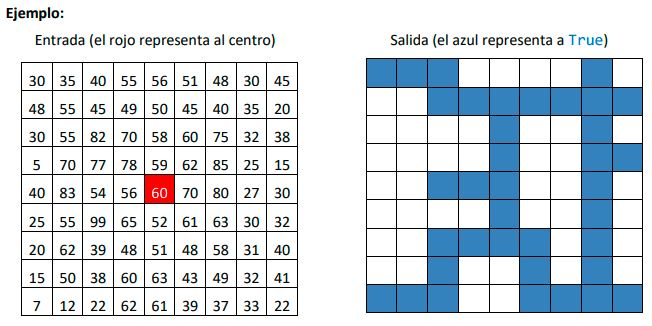

## Solución

In [24]:
def leerArchivo(nombreArchivo):
    lineas = []
    with open(nombreArchivo, 'r') as f:
        for linea in f:
            lineas.append(linea)
    return lineas

def recuperarMatrizLadera(nombreArchivo):
    lineas = leerArchivo(nombreArchivo)
    linea0 = lineas[0].split()
    m= int(linea0[0]); n= int(linea0[1])
    lineas.pop(0)
    #Armamos la matriz ladera
    A = [ [int(i) for i in linea.split()] for linea in lineas]
    #Armamos la matriz logica
    B = [ [0 for c in range(n)] for f in range(m)]
    #Devolvemos las matrices
    return A,B,m,n

def pintarLava(A,B,f,c,m,n):
    B[f][c]= 1   
    if(f-1>-1):
        if(B[f-1][c]==0 and A[f-1][c]<A[f][c]):
            pintarLava(A,B,f-1,c,m,n)
    if(f+1<m):
        if(B[f+1][c]==0 and A[f+1][c]<A[f][c]):
            pintarLava(A,B,f+1,c,m,n)
    if(c-1>-1):
        if(B[f][c-1]==0 and A[f][c-1]<A[f][c]):
            pintarLava(A,B,f,c-1,m,n)
    if(c+1<n):
        if(B[f][c+1]==0 and A[f][c+1]<A[f][c]):
            pintarLava(A,B,f,c+1,m,n)

import matplotlib.pyplot as plt
def generarGrafico(matrizLogica):
    fig, ax = plt.subplots()
    ax.matshow(matrizLogica, cmap=plt.cm.Blues)
    #plt.axis('off')
    plt.show()

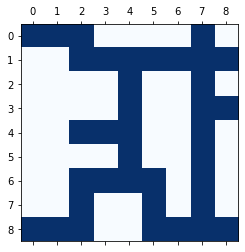

In [25]:
A,B,m,n= recuperarMatrizLadera("alturasTarea10.txt")

pintarLava(A,B,int((m-1)/2),int((n-1)/2),m,n)

generarGrafico(B)